# Model Interpretation

## Importing data

In [1]:
import kagglehub
import numpy as np
import pandas as pd

path_classification = kagglehub.dataset_download("kukuroo3/body-performance-data", path="bodyPerformance.csv")
path_regression = kagglehub.dataset_download("sanjeetsinghnaik/used-car-information", path="Dataset.csv")

df_classification = pd.read_csv(path_classification)
df_regression = pd.read_csv(path_regression)

#### Classification

In [ ]:
df_classification.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [ ]:
df_classification['class'].unique()

array(['C', 'A', 'B', 'D'], dtype=object)

In [ ]:
df_classification.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
df_classification.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


<Axes: >

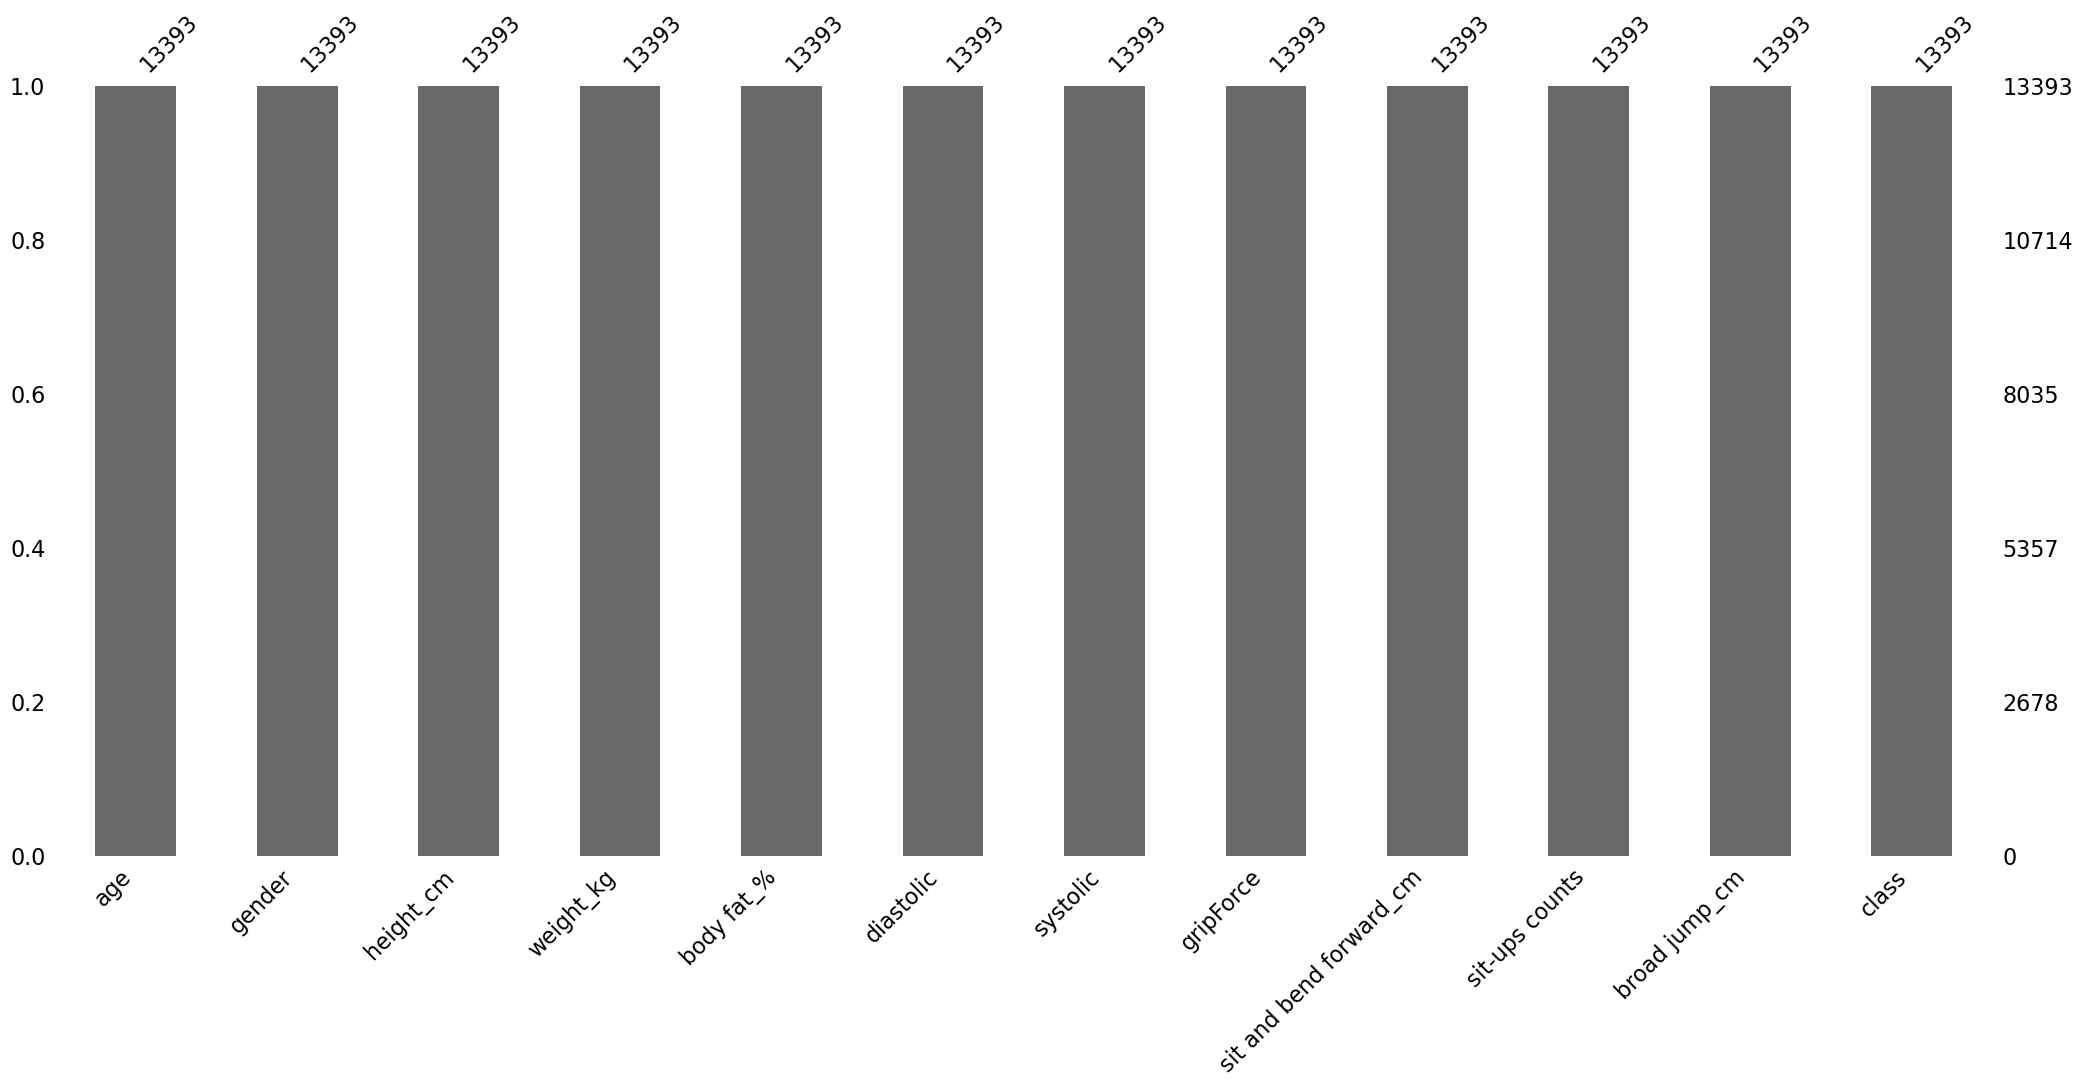

In [ ]:
import missingno as msno
%matplotlib inline
msno.bar(df_classification)

As we could see the dataset is full and there isn't need to complete with anything. The only thing will have to do to this dataset is to transform objects type into a numeric one.

#### Regression

In [ ]:
df_regression.head()

,Unnamed: 0,Id,year,brand,full_model_name,model_name,price,distance_travelled(kms),fuel_type,city,...,new and less used,inv_car_price,inv_car_dist,inv_car_age,inv_brand,std_invprice,std_invdistance_travelled,std_invrank,best_buy1,best_buy2
0,0,0,2016,Honda,Honda Brio S MT,Brio,425000.0,9680.0,Petrol,Mumbai,...,0,2.352941e-06,0.000103,0.200000,0.142857,0.143417,0.035730,0.132143,677.134239,0.000000
1,1,1,2012,Nissan,Nissan Sunny XV Diesel,Sunny,325000.0,119120.0,Diesel,Mumbai,...,0,3.076923e-06,0.000008,0.111111,0.090909,0.188859,0.002496,0.079545,37.501318,0.000000
2,2,2,2017,Toyota,Toyota Fortuner 2.8 4x2 MT [2016-2020],Fortuner,2650000.0,64593.0,Diesel,Thane,...,0,3.773585e-07,0.000015,0.250000,1.000000,0.019416,0.004978,1.000000,96.646020,0.000000
3,3,3,2017,Mercedes-Benz,Mercedes-Benz E-Class E 220d Expression [2019-...,E-Class,4195000.0,25000.0,Diesel,Mumbai,...,1,2.383790e-07,0.000040,0.250000,0.500000,0.010692,0.013563,0.493750,71.604306,71.604306
4,4,4,2012,Hyundai,Hyundai Verna Fluidic 1.6 CRDi SX,Verna,475000.0,23800.0,Diesel,Mumbai,...,0,2.105263e-06,0.000042,0.111111,0.071429,0.127871,0.014269,0.059821,109.150857,0.000000


In [ ]:
columns_to_keep = {"year","brand","full_model_name","model_name","price","distance_travelled(kms)","fuel_type","city"} # here I extracted the columns that I need
current_columns = set(df_regression.columns)
df_regression = df_regression.drop(current_columns - columns_to_keep, axis=1) 

In [ ]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1725 non-null   int64  
 1   brand                    1725 non-null   object 
 2   full_model_name          1725 non-null   object 
 3   model_name               1725 non-null   object 
 4   price                    1725 non-null   float64
 5   distance_travelled(kms)  1725 non-null   float64
 6   fuel_type                1725 non-null   object 
 7   city                     1725 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 107.9+ KB


<Axes: >

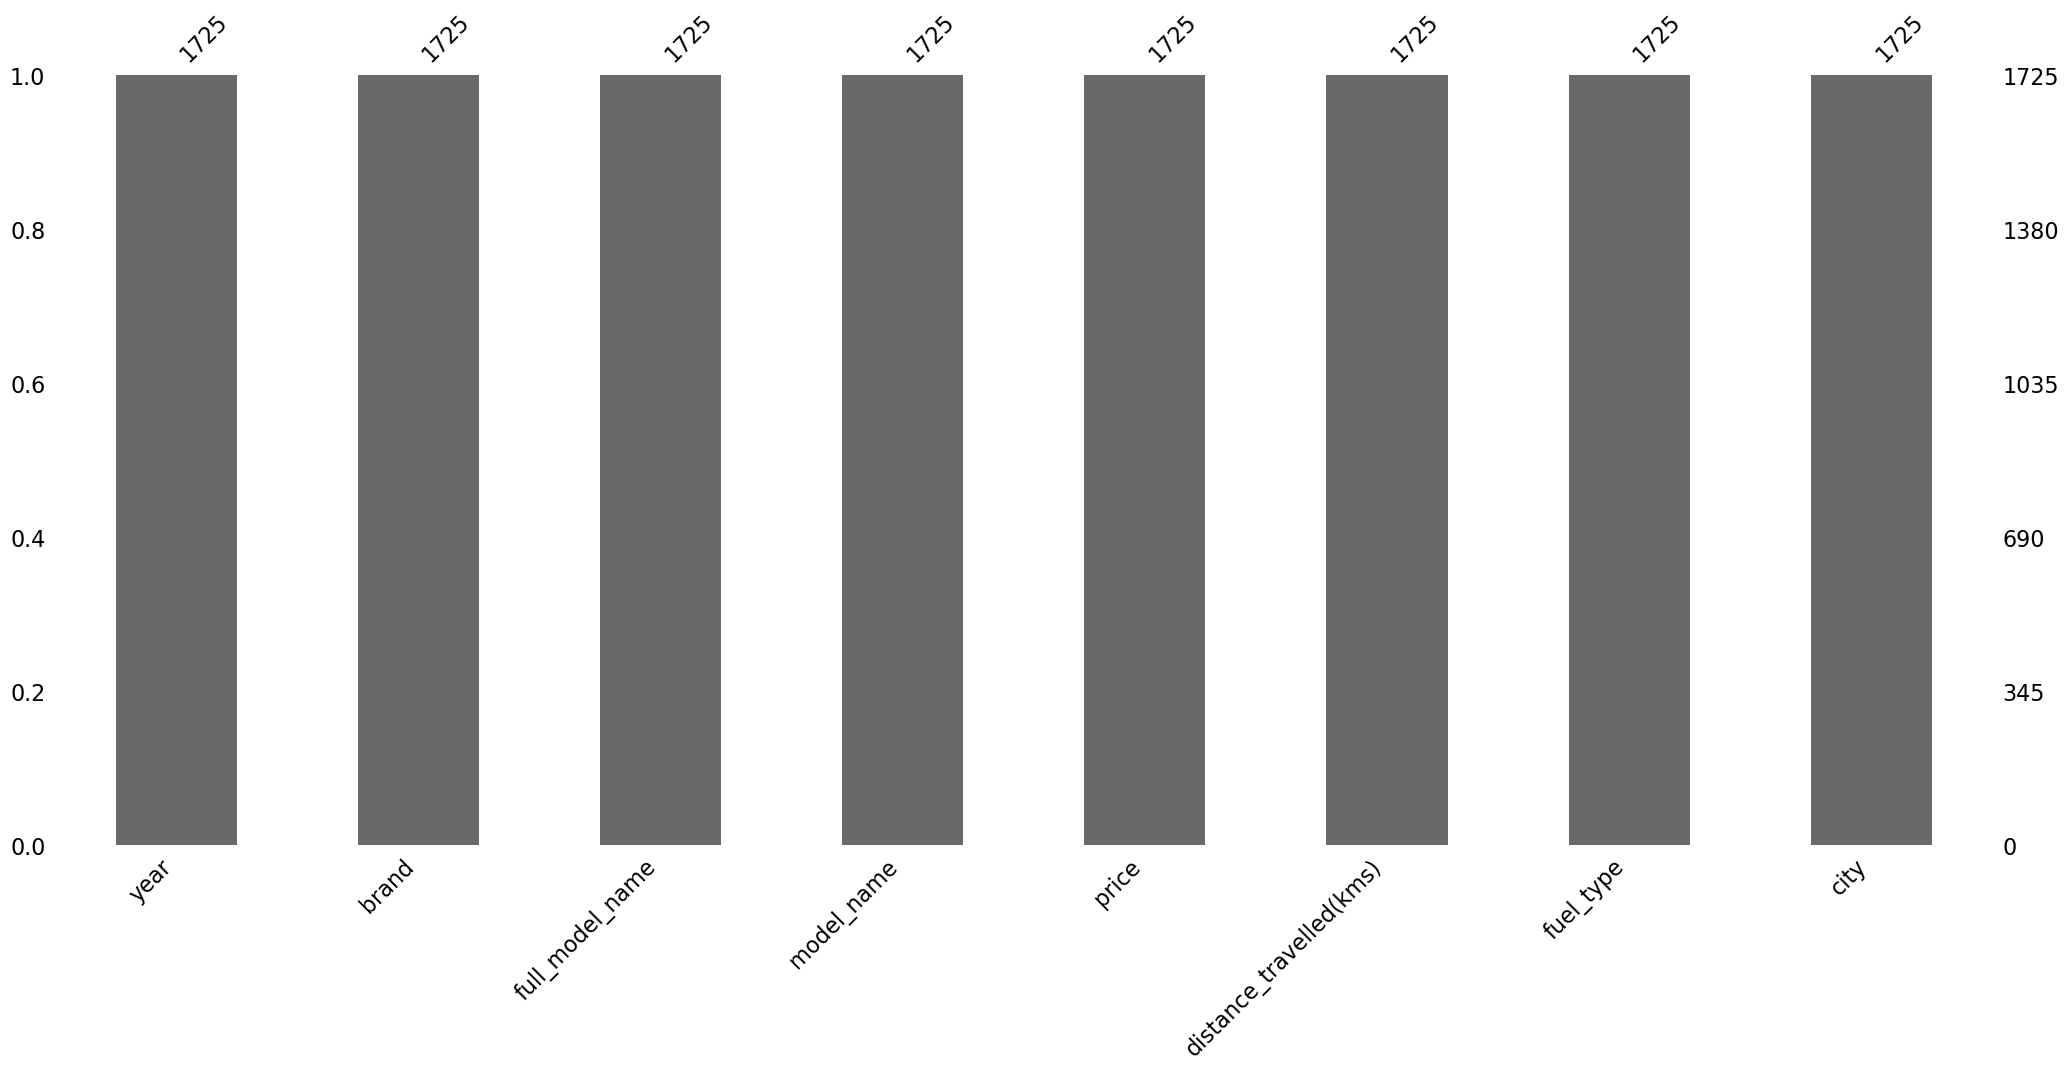

In [ ]:
import missingno as msno
%matplotlib inline
msno.bar(df_regression)

Here could be observed that there are no missing datas.

In [ ]:
columns_with_objects = df_regression.select_dtypes(include=['object']).columns


unique_values_by_feature =  pd.DataFrame({}, columns=['feature', 'Unique values count'])
for column in columns_with_objects:
    nr = df_regression[column].nunique()
    
    unique_values_by_feature = pd.concat([
        unique_values_by_feature, 
        pd.DataFrame({"feature": [column], "Unique values count":[nr]})
    ], ignore_index=True)
    
unique_values_by_feature

,feature,Unique values count
0,brand,31
1,full_model_name,750
2,model_name,169
3,fuel_type,5
4,city,15


Here we could observe that there a lot of classes, if we will have to apply *dummy variables* to this dataset we will get $30+749+168+4+14=965$ extra columns. This is not good... I need to find different methods for feature engineering this fields.

I propose to give each feature class a rank that's representative to the price. As I see the algorithm:
1. Calculate the mean of the feature price by class.
2. Sort the classes ascending by their price
3. Assign for the first(lowest price) 1.
4. For every next class assign a rank of 
$$
r_n = \frac{price_n}{price_{n-1}}\times r_{n-1}
$$
5. optionally to apply MinMaxScaling. 
This way the class will be correlated with the price.

This method I will apply for the *brand*, *city* and *model_name*. For the *fuel_type* will try to apply Frequency Imputation from imperio if this will not be possible will apply dummy variables 

## Preprocesing

### Classification

In [ ]:
## print all classes that a column has for object features
print(df_classification['gender'].unique())
print(df_classification['class'].unique())

['M' 'F']
['C' 'A' 'B' 'D']


In [ ]:
from sklearn.preprocessing import LabelEncoder

class_values = ['D','C', 'B','A'] # 0, 1, 2, 3 so that A will have the greatest value
gender_values = ['F','M' ] # 0, 1

for key, feature_values in {"class":class_values, "gender":gender_values}.items():
    label_encoder = LabelEncoder()
    label_encoder.fit(feature_values)
    df_classification[key] = label_encoder.transform(df_classification[key])

### Regression

In [ ]:
class CustomFeatureEngineering:
    
    def __init__(self, feature, target_column):
        self.df_processing = pd.DataFrame({})
        self.classes = []
        self.feature = feature
        self.target_column = target_column
        self.df = pd.DataFrame({})
    
    def fit(self, df: pd.DataFrame):
        self.df = df
        self.classes = df[self.feature].unique()
        class_to_mean = {"class":[], "mean":[]}
        for i, clasa in enumerate(self.classes):
            df_clasa = df[df[self.feature] == clasa] # select all values where feature == clasa
            mean = df_clasa[self.target_column].mean()
            class_to_mean["class"].append(clasa)
            class_to_mean["mean"].append(mean)
        
        self.df_processing =  pd.DataFrame(class_to_mean).sort_values(by="mean")
        self.df_processing['rank'] = 1.0
        for i in range(1, len(self.df_processing)):
            self.df_processing.loc[self.df_processing.index[i], 'rank'] = (
                self.df_processing.loc[self.df_processing.index[i], 'mean'] / 
                self.df_processing.loc[self.df_processing.index[i-1], 'mean']
            ) * self.df_processing.loc[self.df_processing.index[i-1], 'rank']
    
    def transform(self):
        for i in range(0, len(self.df_processing)):
            category = self.df_processing.loc[i, "class"]
            self.df.loc[lambda x: x[self.feature] == category, self.feature] = self.df_processing.loc[i, "rank"]
        return self.df
            

In [ ]:
df_regression = df_regression.drop("full_model_name", axis=1)

In [ ]:
for feature in ["brand", "city", "model_name"]:
    cufe = CustomFeatureEngineering(feature=feature, target_column="price")
    cufe.fit(df_regression)
    result = cufe.transform()

In [ ]:
df_regression.head()

,year,brand,model_name,price,distance_travelled(kms),fuel_type,city
0,2016,3.55923,3.009091,425000.0,9680.0,Petrol,3.675195
1,2012,2.110187,3.806818,325000.0,119120.0,Diesel,3.675195
2,2017,8.689074,22.59596,2650000.0,64593.0,Diesel,2.055682
3,2017,17.74021,25.660997,4195000.0,25000.0,Diesel,3.675195
4,2012,4.10041,7.734368,475000.0,23800.0,Diesel,3.675195


In [ ]:
df_regression["fuel_type"].unique()

array(['Petrol', 'Diesel', 'Petrol + 1', 'CNG + 1', 'Hybrid'],
      dtype=object)

We can't proceed the same for *fuel_type* as above therefor we should find a different way of converting the object types into a numerical value. Unfortunately the imperio package from the sigmoid doesn't work properly thus I will simply apply dummy variables because there aren't many variables.

In [ ]:
df_regression = pd.get_dummies(df_regression, columns=['fuel_type'], drop_first = True)

In [ ]:
df_regression.head()

,year,brand,model_name,price,distance_travelled(kms),city,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Petrol,fuel_type_Petrol + 1
0,2016,3.55923,3.009091,425000.0,9680.0,3.675195,False,False,True,False
1,2012,2.110187,3.806818,325000.0,119120.0,3.675195,True,False,False,False
2,2017,8.689074,22.59596,2650000.0,64593.0,2.055682,True,False,False,False
3,2017,17.74021,25.660997,4195000.0,25000.0,3.675195,True,False,False,False
4,2012,4.10041,7.734368,475000.0,23800.0,3.675195,True,False,False,False


### Train a linear regression model on the regression data set and make a bar plot using the weights of the linear model. Interpret the plot.

In [ ]:
df_regression.describe()

,year,price,distance_travelled(kms)
count,1725.000000,1.725000e+03,1725.000000
mean,2015.390725,1.494837e+06,53848.256232
std,3.207504,1.671658e+06,44725.541963
min,1990.000000,6.250000e+04,350.000000
25%,2013.000000,5.450000e+05,29000.000000
50%,2016.000000,8.750000e+05,49000.000000
75%,2018.000000,1.825000e+06,70500.000000
max,2021.000000,1.470000e+07,790000.000000


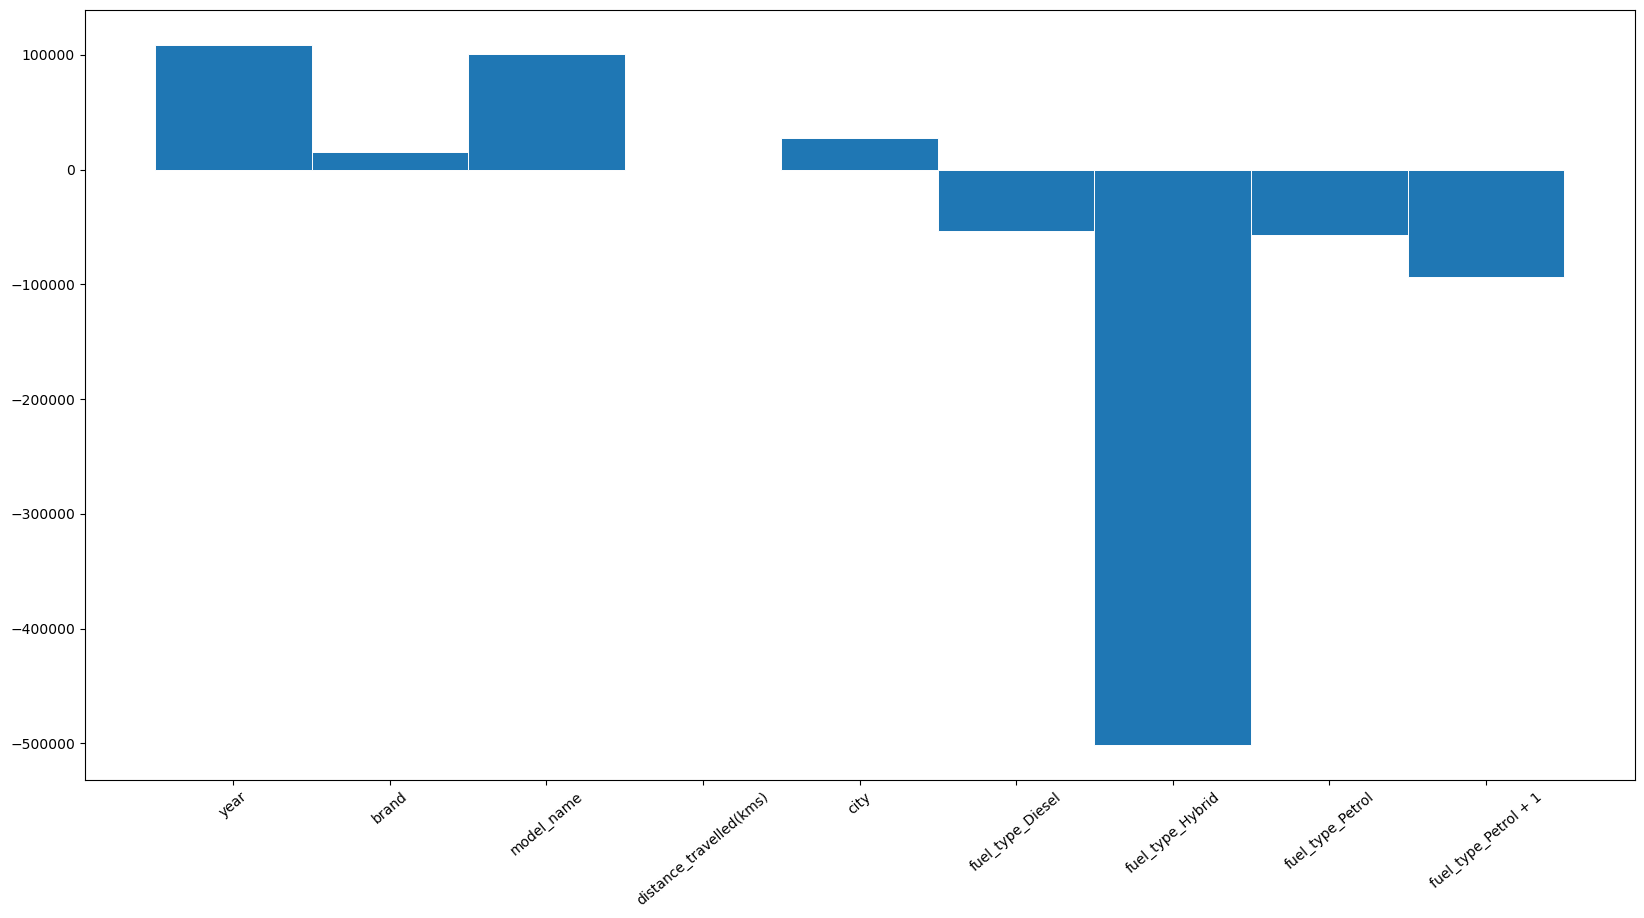

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

y_regression = df_regression['price']
x_regression =  df_regression.drop("price", axis=1)

linear = LinearRegression()
linear.fit(x_regression, y_regression)
fig, ax = plt.subplots(figsize=(20, 10))

ax.bar(linear.feature_names_in_, linear.coef_, width=1, edgecolor="white", linewidth=0.7)
# fig.tight_layout()
plt.xticks(rotation=40)
plt.show()


Here we can see that the most significant feature that influence the price is fuel_type_Hybrid. And the distance_travelled(kms) has a zero influence on the output price.

### Generate on the classification data set the image showing the decision tree.

In [ ]:
df_classification.describe()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,0.632196,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627,1.500187
std,13.625639,0.482226,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000,1.118109
min,21.000000,0.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000,1.000000
50%,32.000000,1.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000,2.000000
75%,48.000000,1.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000,3.000000
max,64.000000,1.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000,3.000000


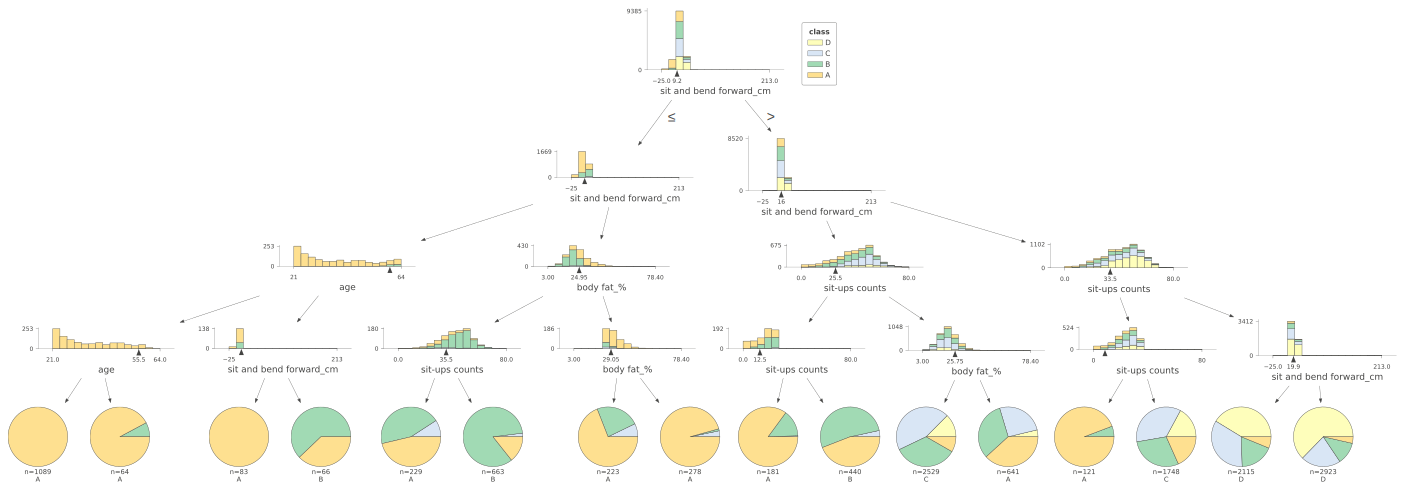

In [ ]:
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

from sklearn.tree import DecisionTreeClassifier
import dtreeviz

y_classification = df_classification["class"]
x_classification = df_classification.drop("class", axis=1)

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(x_classification.values, y_classification.values)

viz_model = dtreeviz.model(clf,
                           X_train=x_classification.values, y_train=y_classification.values,
                           feature_names=x_classification.columns,
                           target_name='class',
                           class_names=['D', 'C', 'B', 'A'])
# v = viz_model.view()     
# v.show()                 
# v.save("/tmp/iris.svg")
viz_model.view()

We can observe that *sit and bend forward* has the greatest importance in predicting the class. And the rest features like *age*, *body_fat* and *sit-ups count* are distributed normally in sens that any of this have an equal importance because they are the same level of depth. 

## Training Classification

In [ ]:
from sklearn.model_selection import  train_test_split

x_train_class, x_test_class, y_train_class, y_test_class  = train_test_split(x_classification.to_numpy(), y_classification.to_numpy(), test_size=0.3, random_state=78)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

clasifiers = [
    Pipeline(
        [
           ("scaler", StandardScaler()),
            ("clf", LogisticRegression(max_iter=1000, random_state=11),) 
        ]
    ),

    GaussianNB(), 
    KNeighborsClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier()
]
columns=[ "Accuracy", "Recall", "Precision", "F1 Score"]
scores = pd.DataFrame()
for clf in clasifiers:
    clf.fit(x_train_class, y_train_class)
    
    y_pred = clf.predict(x_test_class)
    
    accuracy = accuracy_score(y_test_class, y_pred)
    recall = recall_score(y_test_class, y_pred, average='macro')
    precision = precision_score(y_test_class, y_pred,  average='macro')
    f1 = f1_score(y_test_class, y_pred,  average='macro')
    
    scores = pd.concat([scores, pd.DataFrame([[accuracy, recall, precision, f1]], index=[clf.__class__.__name__], columns=columns)])
scores

,Accuracy,Recall,Precision,F1 Score
Pipeline,0.610752,0.613987,0.609104,0.610794
GaussianNB,0.534345,0.538240,0.526428,0.528914
KNeighborsClassifier,0.559980,0.563861,0.589052,0.563258
RandomForestClassifier,0.721503,0.724148,0.726658,0.723145
DecisionTreeClassifier,0.626431,0.628377,0.626231,0.627219


As we could see, and we know from experience the RandomForestClassifier gives us the best results. In general classifiers based on decisiontree are more performant in terms of accuracy. Also, the data card will imply that for this task is more important the precision rather than recall.

#### Shap

In [ ]:
import shap
shap.initjs()

PermutationExplainer explainer: 4019it [22:09,  3.00it/s]                                                                      


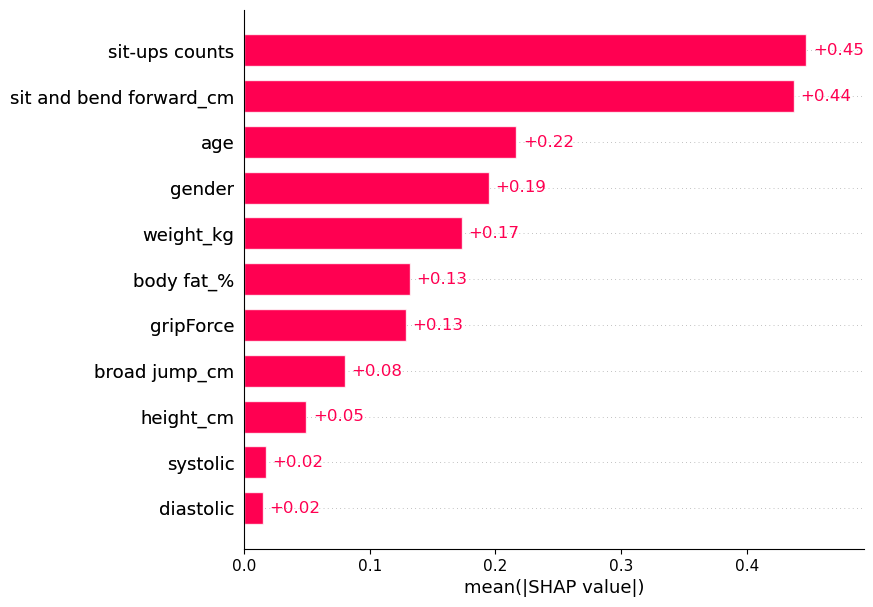

In [ ]:
forest = clasifiers[3]
explainer = shap.Explainer(forest.predict, x_train_class, feature_names = list(df_classification.columns)[:-1])

shap_values = explainer(x_test_class)
shap.plots.bar(shap_values, max_display=14)

Here we could extract the main features that have the greatest impact on the model prediction that are *sit-ups counts* and *sit and bend forward-cm*.

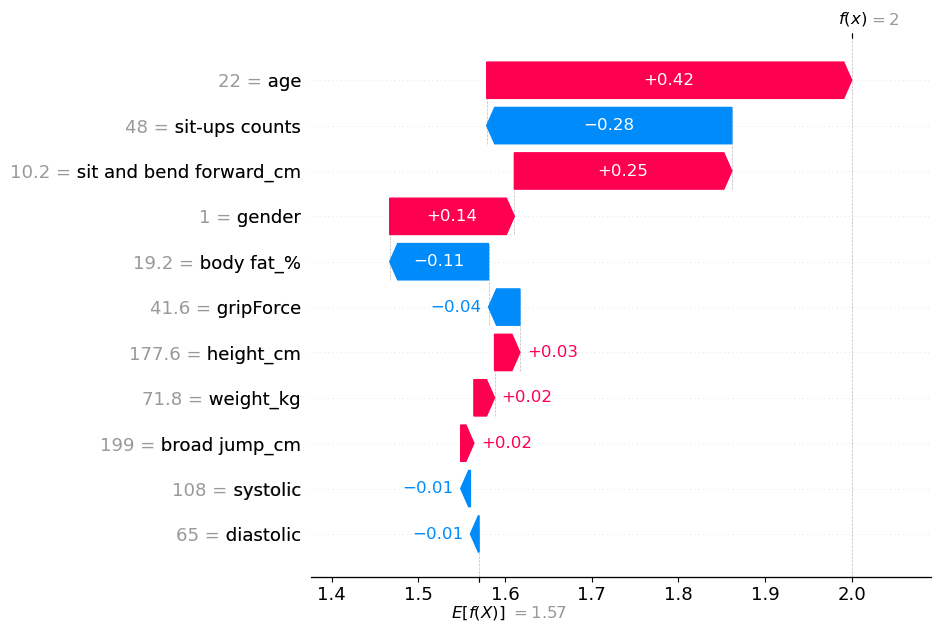

In [ ]:
shap.plots.waterfall(shap_values[0], max_display=14)

Here for a specific example we could see how the model took decision based on the input data. A great impact on this particular example is the age. Which was probably the determinant factor because the next two big positions *sit-ups counts* and *sit and bend forward_cm* canceled each other.

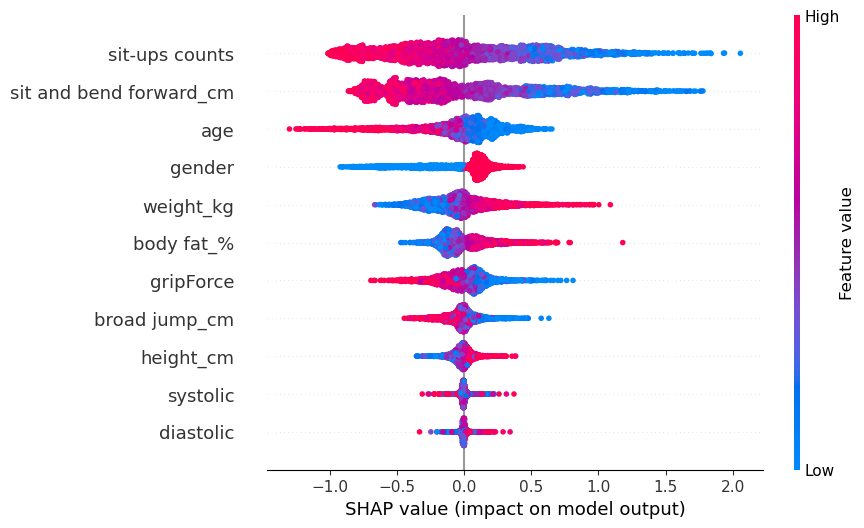

In [ ]:
shap.plots.beeswarm(shap_values, max_display=14)

Here could be seen the importance of the features (descending) on the model. Also, could be observed the values and how it ifluence the final value. For some reason for the *sit-ups counts* and *sit and bend forward_cm* wich intuetivly will mean the higher the values the greater should be the class but for some reason we see the opposite of it. But again for the next feature it acts correctly, for the *age* the greater it is the lower will be the class and vice-versa the lower is the age the greater is the class.

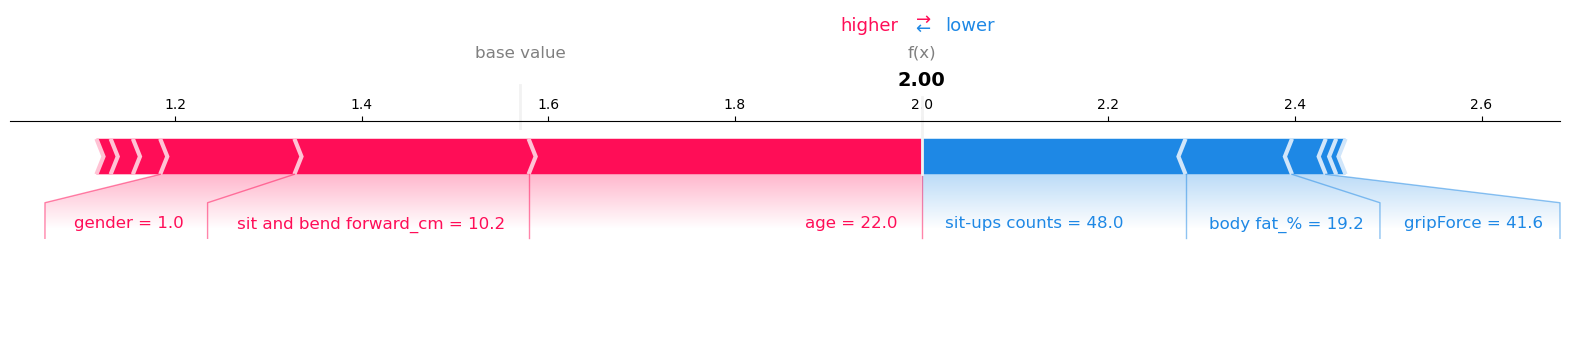

In [43]:
shap.plots.force(shap_values[0], x_test_class[0], matplotlib=True)

Here we can see that *sit and bend forward_cm* is the main contributor for the model from the base value.

## Training Regression

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_regression.to_numpy(), y_regression.to_numpy(), test_size=0.3, random_state=78)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error


clasifiers = [
    LinearRegression(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
]
columns=[ "MSE", "MAE", "RMSE"]
scores = pd.DataFrame()
for clf in clasifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    
    scores = pd.concat([scores, pd.DataFrame([[mse, mae, rmse]], index=[clf.__class__.__name__], columns=columns)])
scores

,MSE,MAE,RMSE
LinearRegression,3.727854e+11,373756.023553,6.105615e+05
DecisionTreeRegressor,1.743388e+11,175739.060489,4.175389e+05
KNeighborsRegressor,1.506782e+12,714583.976834,1.227510e+06
RandomForestRegressor,1.128659e+11,169016.781922,3.359553e+05


In [34]:
forest = clasifiers[3]


predictions = forest.predict(x_test)
differences = np.abs(predictions - y_test)
highest_diff_index = np.argmax(differences)
highest_diff_index

265

In [ ]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(
    x_train,
    feature_names = df_regression.columns.drop("price"),
    class_names = ['price'],
    categorical_features = ['year', 'fuel_type_Diesel', 'fuel_type_Petrol', 'fuel_type_Petrol + 1'],
    verbose=True, 
    mode='regression'
)

In [36]:
exp = explainer.explain_instance(x_test[highest_diff_index], forest.predict)

Intercept 633157.5522219434
Prediction_local [3974063.4914864]
Right: 2613480.0


In [ ]:
exp.show_in_notebook(show_table=True, show_all=False)

Here we could observe the changes made during feature engineering have a significant effect on the final model. The *model_name* gives us the greatest increase in price, this could be the reason why we get such a big difference tho not sure because the range in which this values fluctuates is imense. Also we could observe that the main factors that make a cheper the car is the fuel_type and the distance traveled.

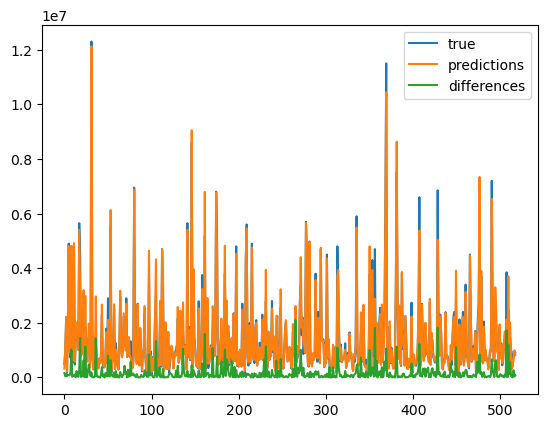

In [38]:
fig, axes = plt.subplots()
axes.plot(y_test, label="true")
axes.plot(predictions, label="predictions")
axes.plot(differences, label="differences")
axes.legend()
plt.show()

Here we could see how the predictions and true values are almost overlaped wich leads that is  a good estimator. And at the bottom with green could be seen the differences between the true and predictions were we could trace how much model went wrong. Those picks could be influnced by the outliers.

## Conclusion

As a conclusion we trained both a regression and a classifier and explored more in depth the model by using simple techniques like weights of the features wich is an easy and very useful method for simple model like Linears one. Also we used the DecisionGraph (a more advanced one) which can clearly show the impact of each feature at each depth. And to the end we applied some more advanced techniques like lime and shap which gives us a more in detail description of the model and the influence of each feature to the final prediction. We ploted several graphs fron which we concluded the main features and the model tendencies.